In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from folium import plugins

In [2]:
airb_org = pd.read_csv('C:\\Users\\aman1\\OneDrive\\Desktop\\data science\\assinment\\listings.csv')
airb_org.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,04-01-2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,04-01-2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,04-01-2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,04-01-2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,04-01-2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
airb_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
airb = airb_org.copy()

<Axes: title={'center': 'missing values in percent'}>

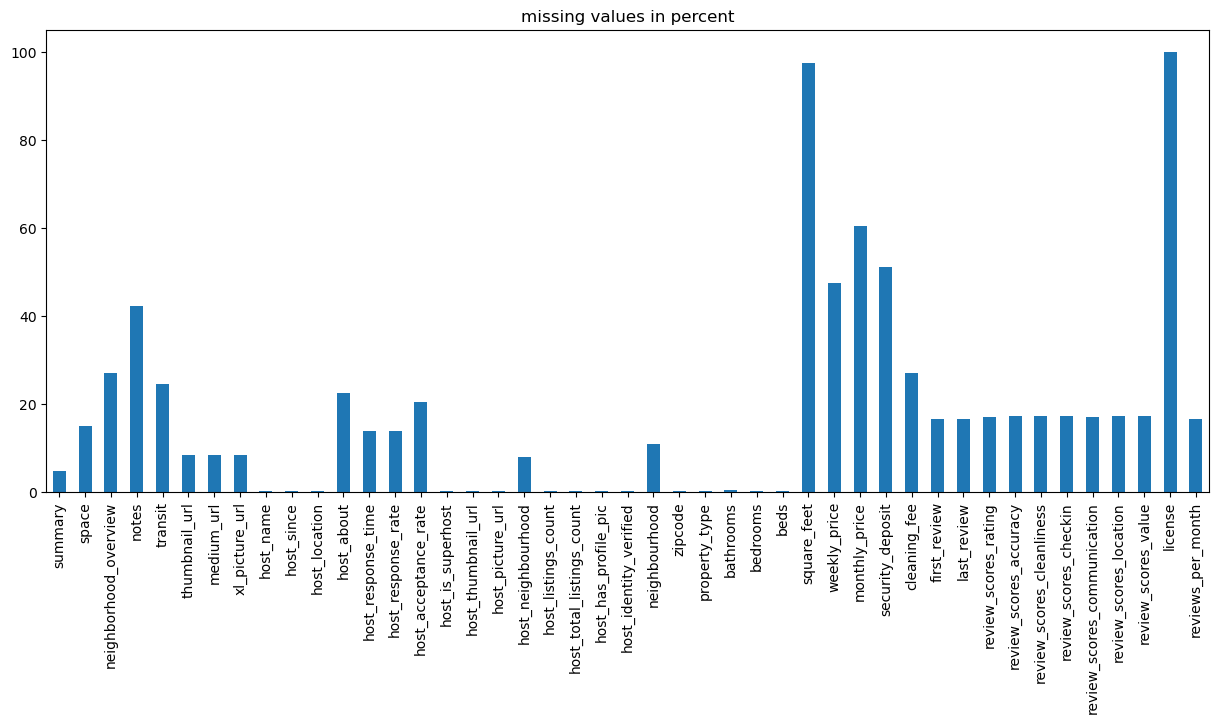

In [5]:
missing_value = airb.isnull().mean()*100
missing_value_nan =missing_value[missing_value>0]
missing_value_nan.plot.bar(title = 'missing values in percent',x='columns',y='missing percentage',figsize = (15,6))

From this graph above 40% of columns cannot be treated so we are gona drop them

In [6]:
new_airb =airb.drop(['license','square_feet','monthly_price','listing_url','scrape_id', 'summary', 
                     'space', 'description','experiences_offered', 'neighborhood_overview', 'notes', 'thumbnail_url',
                     'medium_url','picture_url', 'xl_picture_url', 'host_id', 'host_url',
                    'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                    'market', 'smart_location', 'country_code', 'calendar_updated','amenities',
                    'calendar_last_scraped',  'license', 'jurisdiction_names','city',
                    'weekly_price','monthly_price','transit','id','host_verifications',
                     'neighbourhood_group_cleansed','last_scraped','host_listings_count','has_availability',
                     'neighbourhood_cleansed','requires_license','country','state','host_acceptance_rate'],axis = 1)

In [7]:
new_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              3818 non-null   object 
 1   host_name                         3816 non-null   object 
 2   host_since                        3816 non-null   object 
 3   host_response_time                3295 non-null   object 
 4   host_response_rate                3295 non-null   object 
 5   host_is_superhost                 3816 non-null   object 
 6   host_neighbourhood                3518 non-null   object 
 7   host_total_listings_count         3816 non-null   float64
 8   host_has_profile_pic              3816 non-null   object 
 9   host_identity_verified            3816 non-null   object 
 10  street                            3818 non-null   object 
 11  neighbourhood                     3402 non-null   object 
 12  zipcod

In [8]:
float_column=new_airb.select_dtypes(include =['float64'])
object_column=new_airb.select_dtypes(include =['object'])
int_column=new_airb.select_dtypes(include =['int64'])
float_column.head()

,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3.0,47.636289,-122.371025,1.0,1.0,1.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,6.0,47.639123,-122.365667,1.0,1.0,1.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,2.0,47.629724,-122.369483,4.5,5.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,47.632918,-122.372471,2.0,3.0,3.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89


In [9]:
int_column.head()

,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,4,2,1,365,14,41,71,346,207,2
1,4,1,2,90,13,13,16,291,43,6
2,11,10,4,30,1,6,17,220,20,2
3,3,1,1,1125,0,0,0,143,0,1
4,6,6,1,1125,30,60,90,365,38,1


In [10]:
object_column.head(3)

,name,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,street,...,price,security_deposit,cleaning_fee,extra_people,first_review,last_review,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Stylish Queen Anne Apartment,Maija,11-08-2011,within a few hours,96%,f,Queen Anne,t,t,"Gilman Dr W, Seattle, WA 98119, United States",...,$85.00,NaN,NaN,$5.00,01-11-2011,02-01-2016,f,moderate,f,f
1,Bright & Airy Queen Anne Apartment,Andrea,21-02-2013,within an hour,98%,t,Queen Anne,t,t,"7th Avenue West, Seattle, WA 98119, United States",...,$150.00,$100.00,$40.00,$0.00,19-08-2013,29-12-2015,f,strict,t,t
2,New Modern House-Amazing water view,Jill,12-06-2014,within a few hours,67%,f,Queen Anne,t,t,"West Lee Street, Seattle, WA 98119, United States",...,$975.00,"$1,000.00",$300.00,$25.00,30-07-2014,03-09-2015,f,strict,f,f


In [11]:
for f in float_column:
    print(f'the unique values in feature {f} is :',float_column[f].unique(),sep='\n')
    print('--------------------------------------------------------------------')

the unique values in feature host_total_listings_count is :
[  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11. 169.  48. 502.  12.  nan  18.  19.  15.  84. 163.  17.]
--------------------------------------------------------------------
the unique values in feature latitude is :
[47.63628904 47.63912312 47.62972413 ... 47.50845297 47.63233495
 47.6411863 ]
--------------------------------------------------------------------
the unique values in feature longitude is :
[-122.3710252 -122.3656665 -122.3694832 ... -122.240607  -122.2755303
 -122.3420846]
--------------------------------------------------------------------
the unique values in feature bathrooms is :
[1.  4.5 2.  3.5 1.5 2.5 3.  0.5 4.  0.  8.  nan 5. ]
--------------------------------------------------------------------
the unique values in feature bedrooms is :
[ 1.  5.  0.  3.  2.  6.  4. nan  7.]
--------------------------------------------------------------------
the unique values in f

In [12]:
for o in object_column:
    print(f'the unique values in feature {o} is :',object_column[o].unique(),sep='\n')
    print('--------------------------------------------------------------------')

the unique values in feature name is :
['Stylish Queen Anne Apartment' 'Bright & Airy Queen Anne Apartment'
 'New Modern House-Amazing water view' ...
 'Private apartment view of Lake WA' 'Amazing View with Modern Comfort!'
 'Large Lakefront Apartment']
--------------------------------------------------------------------
the unique values in feature host_name is :
['Maija' 'Andrea' 'Jill' ... 'Flora' 'Eve' 'Virginia']
--------------------------------------------------------------------
the unique values in feature host_since is :
['11-08-2011' '21-02-2013' '12-06-2014' ... '27-03-2011' '30-12-2015'
 '25-04-2014']
--------------------------------------------------------------------
the unique values in feature host_response_time is :
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']
--------------------------------------------------------------------
the unique values in feature host_response_rate is :
['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' 

In [13]:
new_airb['host_since'] = pd.to_datetime(new_airb['host_since'],dayfirst=True)
new_airb['last_review'] = pd.to_datetime(new_airb['last_review'],dayfirst=True)
new_airb['first_review'] = pd.to_datetime(new_airb['first_review'],dayfirst=True)

In [14]:
new_airb['price'] = new_airb['price'].str.replace('$','',regex = False)
new_airb['cleaning_fee'] =new_airb['cleaning_fee'].str.replace('$','',regex = False)
new_airb['extra_people'] =new_airb['extra_people'].str.replace('$','',regex = False)
new_airb['security_deposit'] =new_airb['security_deposit'].str.replace('$','',regex = False)
new_airb['security_deposit'] =new_airb['security_deposit'].str.replace(',','',regex = False)
new_airb['price'] =new_airb['price'].str.replace(',','',regex = False)
new_airb['zipcode'].replace('99\n98122', '',inplace=True)

In [15]:

new_airb['cleaning_fee'] = pd.to_numeric(new_airb['cleaning_fee'])
new_airb['zipcode'] = pd.to_numeric(new_airb['zipcode'])
new_airb['security_deposit'] = pd.to_numeric(new_airb['security_deposit'])
new_airb['host_total_listings_count'] = pd.to_numeric(new_airb['host_total_listings_count'])
new_airb['bedrooms'] = pd.to_numeric(new_airb['bedrooms'])
new_airb['beds'] = pd.to_numeric(new_airb['beds'])
new_airb['price'] = pd.to_numeric(new_airb['price'])
new_airb['extra_people'] = pd.to_numeric(new_airb['extra_people'])

In [16]:
new_airb.loc[new_airb.duplicated()]

,name,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [17]:
new_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              3818 non-null   object        
 1   host_name                         3816 non-null   object        
 2   host_since                        3816 non-null   datetime64[ns]
 3   host_response_time                3295 non-null   object        
 4   host_response_rate                3295 non-null   object        
 5   host_is_superhost                 3816 non-null   object        
 6   host_neighbourhood                3518 non-null   object        
 7   host_total_listings_count         3816 non-null   float64       
 8   host_has_profile_pic              3816 non-null   object        
 9   host_identity_verified            3816 non-null   object        
 10  street                            3818 non-null 

In [18]:
new_airb = new_airb.fillna(new_airb.median(numeric_only=True))

<Axes: title={'center': 'missing values in percent'}>

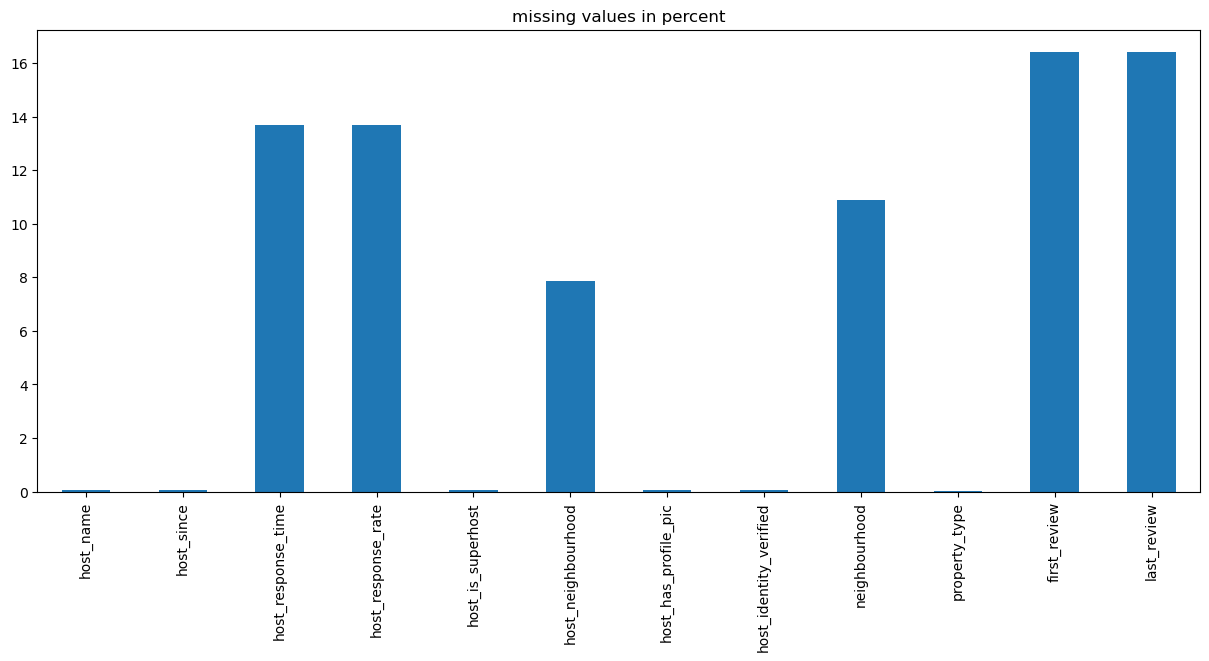

In [19]:
missing_valu = new_airb.isnull().mean()*100
missing_value_na =missing_valu[missing_valu>0]
missing_value_na.plot.bar(title = 'missing values in percent',x='columns',y='missing percentage',figsize = (15,6))

In [20]:
new_airb['host_name'].fillna(new_airb['host_name'].mode()[0], inplace=True)
new_airb['host_response_time'].fillna(new_airb['host_response_time'].mode()[0], inplace=True)
new_airb['host_has_profile_pic'].fillna(new_airb['host_has_profile_pic'].mode()[0], inplace=True)
new_airb['host_identity_verified'].fillna(new_airb['host_identity_verified'].mode()[0], inplace=True)
new_airb['property_type'].fillna(new_airb['property_type'].mode()[0], inplace=True)
new_airb['host_neighbourhood'].fillna(new_airb['host_neighbourhood'].mode()[0], inplace=True)
new_airb['host_is_superhost'].fillna(new_airb['host_is_superhost'].mode()[0], inplace=True)
new_airb['first_review'].fillna(new_airb['first_review'].mode()[0],inplace=True)
new_airb['last_review'].fillna(new_airb['last_review'].mode()[0],inplace=True)
new_airb['host_since'].fillna(new_airb['host_since'].mode()[0],inplace=True)

In [21]:
new_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              3818 non-null   object        
 1   host_name                         3818 non-null   object        
 2   host_since                        3818 non-null   datetime64[ns]
 3   host_response_time                3818 non-null   object        
 4   host_response_rate                3295 non-null   object        
 5   host_is_superhost                 3818 non-null   object        
 6   host_neighbourhood                3818 non-null   object        
 7   host_total_listings_count         3818 non-null   float64       
 8   host_has_profile_pic              3818 non-null   object        
 9   host_identity_verified            3818 non-null   object        
 10  street                            3818 non-null 

In [22]:
new_airb['price'] = new_airb['price'].astype('int64')
new_airb['bedrooms']=new_airb['bedrooms'].astype('int64')
new_airb['beds']=new_airb['beds'].astype('int64')
new_airb['host_total_listings_count'] = new_airb['host_total_listings_count'].astype('int64')
new_airb['cleaning_fee'] = new_airb['cleaning_fee'].astype('int64')
new_airb['security_deposit'] = new_airb['security_deposit'].astype('int64')
new_airb['extra_people'] =new_airb['extra_people'].astype('int64')

In [23]:
new_airb['require_guest_phone_verification'] = new_airb['require_guest_phone_verification'].map({'f':0,'t':1})
new_airb['require_guest_profile_picture'] = new_airb['require_guest_profile_picture'].map({'f':0,'t':1})
new_airb['instant_bookable'] = new_airb['instant_bookable'].map({'f':0,'t':1})
new_airb['is_location_exact'] = new_airb['is_location_exact'].map({'f':0,'t':1})
new_airb['host_identity_verified'] = new_airb['host_identity_verified'].map({'f':0,'t':1})
new_airb['host_has_profile_pic'] = new_airb['host_has_profile_pic'].map({'f':0,'t':1})
new_airb['host_is_superhost'] = new_airb['host_is_superhost'].map({'f':0,'t':1})

In [24]:
float_col = new_airb.select_dtypes(include=['float64'])
int_col =new_airb.select_dtypes(include=['int64'])
object_col = new_airb.select_dtypes(include=['object'])
int_col

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bedrooms,beds,price,security_deposit,...,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,0,3,1,1,1,4,1,1,85,250,...,365,14,41,71,346,207,0,0,0,2
1,1,6,1,1,1,4,1,1,150,100,...,90,13,13,16,291,43,0,1,1,6
2,0,2,1,1,1,11,5,7,975,1000,...,30,1,6,17,220,20,0,0,0,2
3,0,1,1,1,1,3,0,2,100,250,...,1125,0,0,0,143,0,0,0,0,1
4,0,2,1,1,1,6,3,3,450,700,...,1125,30,60,90,365,38,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,354,1,1,1,6,3,3,359,250,...,1125,18,32,32,32,1,0,0,0,8
3814,0,1,1,1,1,4,1,2,79,500,...,29,6,26,44,273,2,0,0,0,1
3815,0,1,1,0,0,2,1,1,93,250,...,7,29,59,88,88,0,0,0,0,1
3816,0,1,1,1,0,2,0,1,99,300,...,1125,30,60,90,179,0,0,0,0,1


In [25]:
new_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              3818 non-null   object        
 1   host_name                         3818 non-null   object        
 2   host_since                        3818 non-null   datetime64[ns]
 3   host_response_time                3818 non-null   object        
 4   host_response_rate                3295 non-null   object        
 5   host_is_superhost                 3818 non-null   int64         
 6   host_neighbourhood                3818 non-null   object        
 7   host_total_listings_count         3818 non-null   int64         
 8   host_has_profile_pic              3818 non-null   int64         
 9   host_identity_verified            3818 non-null   int64         
 10  street                            3818 non-null 

In [26]:
for o in float_col:
    print(f'the unique values in feature {o} is :',float_col[o].unique(),sep='\n')
    print('--------------------------------------------------------------------')

the unique values in feature zipcode is :
[98119. 98109. 98107. 98117. 98112. 98103. 98105. 98115. 98101. 98122.
 98144. 98121. 98102. 98199. 98104. 98134. 98136. 98126. 98146. 98116.
 98177. 98118. 98108. 98133. 98106. 98178. 98125.]
--------------------------------------------------------------------
the unique values in feature latitude is :
[47.63628904 47.63912312 47.62972413 ... 47.50845297 47.63233495
 47.6411863 ]
--------------------------------------------------------------------
the unique values in feature longitude is :
[-122.3710252 -122.3656665 -122.3694832 ... -122.240607  -122.2755303
 -122.3420846]
--------------------------------------------------------------------
the unique values in feature bathrooms is :
[1.  4.5 2.  3.5 1.5 2.5 3.  0.5 4.  0.  8.  5. ]
--------------------------------------------------------------------
the unique values in feature review_scores_rating is :
[ 95.  96.  97.  92.  99.  98. 100.  80.  85.  84.  88.  75.  90.  91.
  94.  93.  77.  8

In [27]:
for i in int_col:
    print(f'the unique values in feature {i} is :',int_col[i].unique(),sep='\n')
    print('--------------------------------------------------------------------')

the unique values in feature host_is_superhost is :
[0 1]
--------------------------------------------------------------------
the unique values in feature host_total_listings_count is :
[  3   6   2   1   5   9   4  36 354   8  37   7  34  10  13  21  11 169
  48 502  12  18  19  15  84 163  17]
--------------------------------------------------------------------
the unique values in feature host_has_profile_pic is :
[1 0]
--------------------------------------------------------------------
the unique values in feature host_identity_verified is :
[1 0]
--------------------------------------------------------------------
the unique values in feature is_location_exact is :
[1 0]
--------------------------------------------------------------------
the unique values in feature accommodates is :
[ 4 11  3  6  2  5 16 10  1  8  7 12  9 15 14]
--------------------------------------------------------------------
the unique values in feature bedrooms is :
[1 5 0 3 2 6 4 7]
--------------------

In [28]:
new_airb['host_since_day'] = new_airb['host_since'].dt.day
new_airb['host_since_month'] = new_airb['host_since'].dt.month
new_airb['host_since_year'] = new_airb['host_since'].dt.year

new_airb['first_review_day'] = new_airb['first_review'].dt.day
new_airb['first_review_month'] = new_airb['first_review'].dt.month
new_airb['first_review_year'] = new_airb['first_review'].dt.year

new_airb['last_review_day'] = new_airb['last_review'].dt.day
new_airb['last_review_month'] = new_airb['last_review'].dt.month
new_airb['last_review_year'] = new_airb['last_review'].dt.year

In [29]:
new_airb = new_airb.drop(['host_since','first_review','last_review'],axis=1)

In [30]:
a =['host_total_listings_count', 'accommodates', 'bedrooms', 'beds','price', 'security_deposit', 'cleaning_fee', 'guests_included',
'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30','availability_60', 'availability_90', 'availability_365',
'number_of_reviews', 'calculated_host_listings_count','bathrooms', 'review_scores_rating',
'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
'review_scores_location', 'review_scores_value', 'reviews_per_month','last_review_year','first_review_year','host_since_year',
'require_guest_phone_verification','require_guest_profile_picture','instant_bookable','is_location_exact','host_identity_verified',
'host_has_profile_pic','host_is_superhost']

<function matplotlib.pyplot.show(close=None, block=None)>

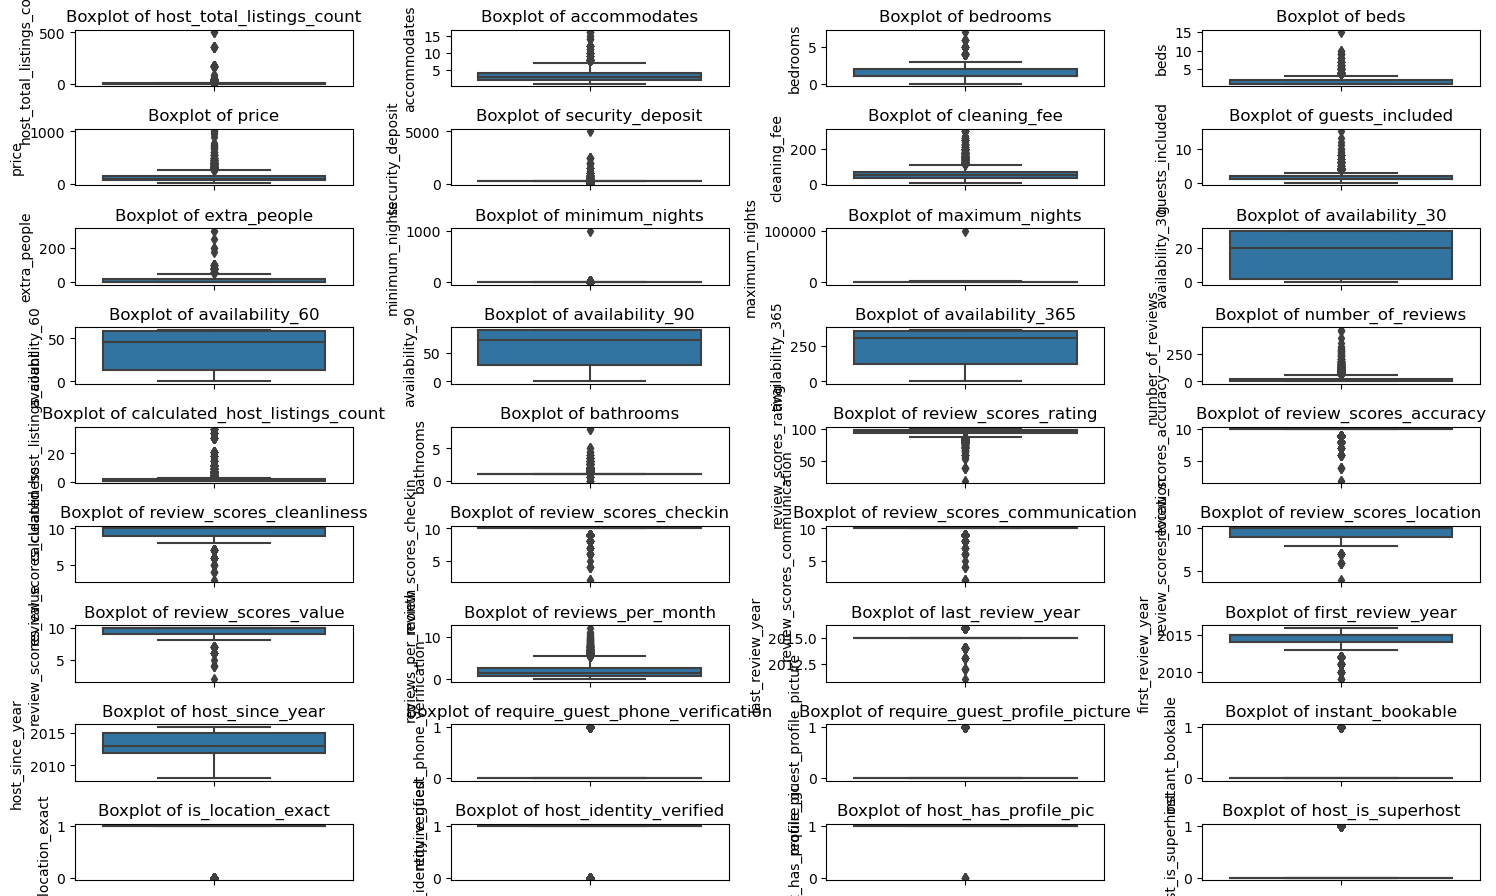

In [31]:
plt.figure(figsize=(15,10))
for i,j in enumerate(a,1):
    plt.subplot(10,4,i)
    sns.boxplot(data=new_airb,y=j)
    plt.title(f'Boxplot of {j}')
    plt.tight_layout()
plt.show

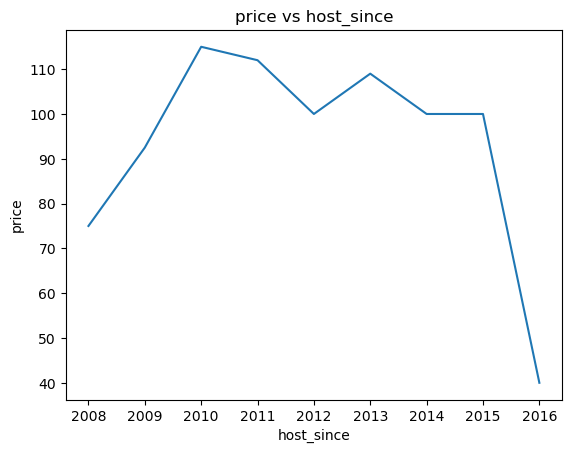

In [32]:
new_airb.groupby('host_since_year')['price'].median().plot()
plt.xlabel('host_since')
plt.ylabel('price')
plt.title('price vs host_since')
plt.show()

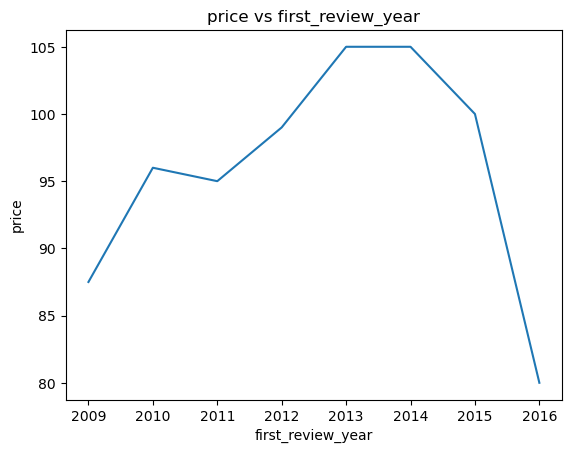

In [33]:
new_airb.groupby('first_review_year')['price'].median().plot()
plt.xlabel('first_review_year')
plt.ylabel('price')
plt.title('price vs first_review_year')
plt.show()

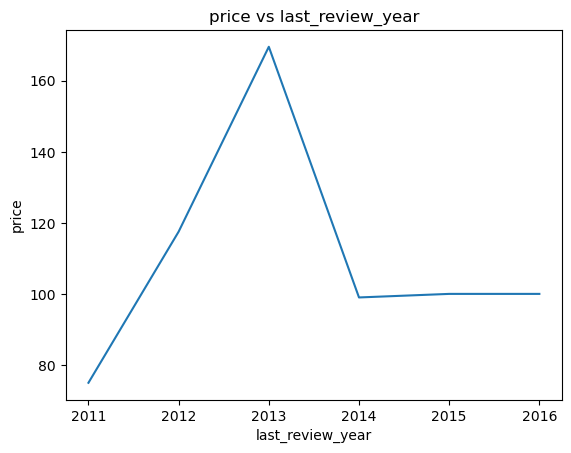

In [34]:
new_airb.groupby('last_review_year')['price'].median().plot()
plt.xlabel('last_review_year')
plt.ylabel('price')
plt.title('price vs last_review_year')
plt.show()

In [35]:
discreat_feature =['host_total_listings_count', 'accommodates', 'bedrooms', 'beds','guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'calculated_host_listings_count',
'zipcode', 'bathrooms', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'host_since_day',
'host_since_month', 'first_review_day', 'first_review_month', 'first_review_year', 'last_review_day', 'last_review_month',
'last_review_year', 'host_since_year','require_guest_phone_verification','require_guest_profile_picture','instant_bookable','is_location_exact','host_identity_verified',
'host_has_profile_pic','host_is_superhost']

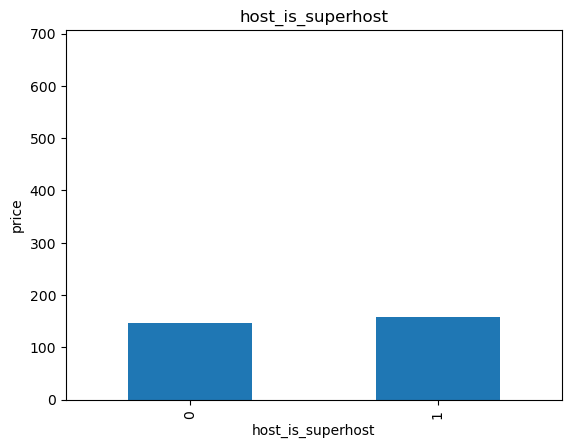

In [36]:
for feature in discreat_feature:
    new_airb.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
plt.show()

In [37]:
continuous_feature = ['host_response_rate', 'latitude', 'longitude', 'price',
                      'security_deposit', 'cleaning_fee', 'reviews_per_month']

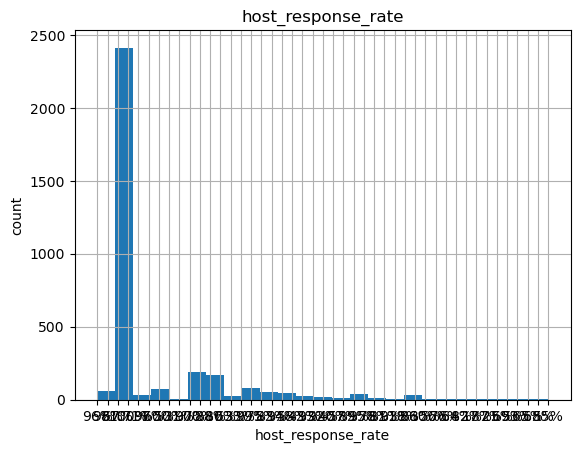

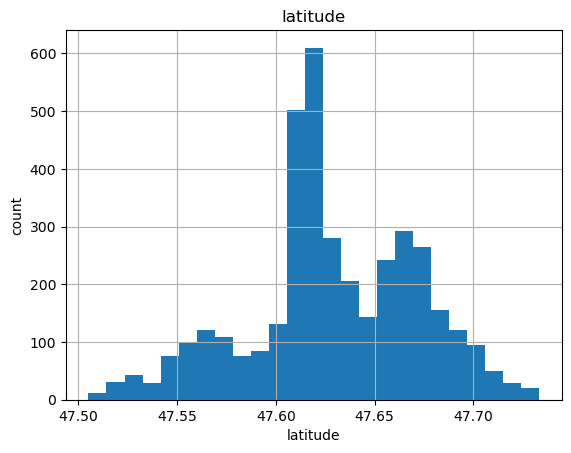

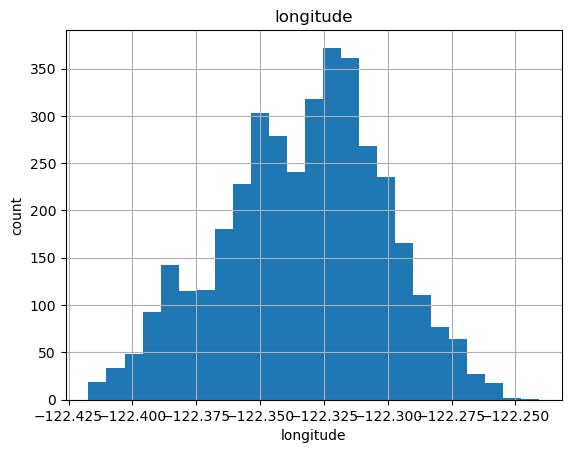

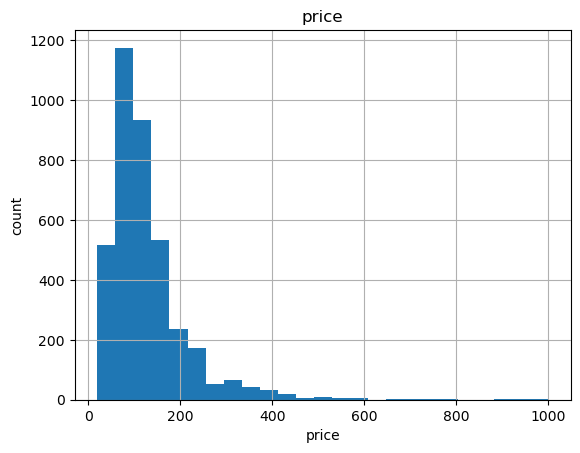

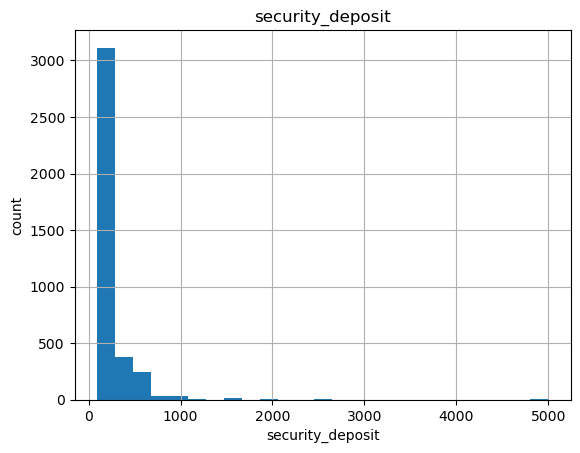

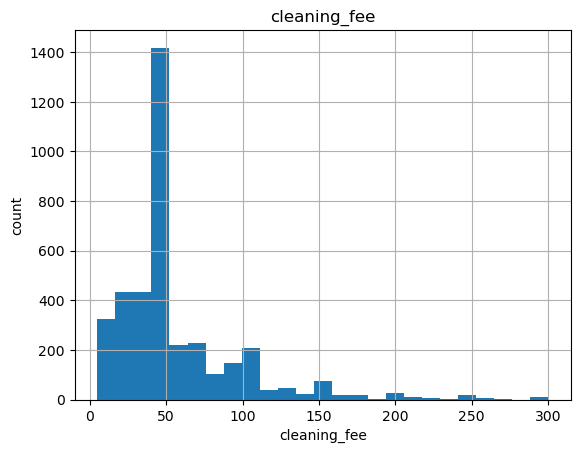

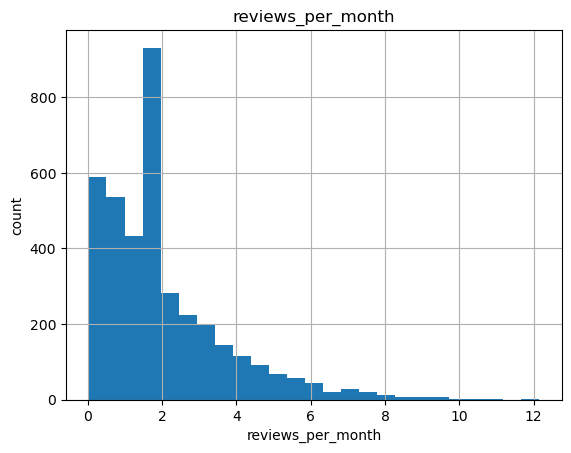

In [38]:
for feature in continuous_feature:
    new_airb[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [39]:
object_col.head(3)

,name,host_name,host_response_time,host_response_rate,host_neighbourhood,street,neighbourhood,property_type,room_type,bed_type,cancellation_policy
0,Stylish Queen Anne Apartment,Maija,within a few hours,96%,Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,Apartment,Entire home/apt,Real Bed,moderate
1,Bright & Airy Queen Anne Apartment,Andrea,within an hour,98%,Queen Anne,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,Apartment,Entire home/apt,Real Bed,strict
2,New Modern House-Amazing water view,Jill,within a few hours,67%,Queen Anne,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,House,Entire home/apt,Real Bed,strict


In [40]:
new_airb['streets'] = new_airb['street'].apply(lambda x: x.split(',')[0] if ',' in x else x)
new_airb['streets'].value_counts()

1st Avenue              55
2nd Avenue              35
Western Avenue          33
Hubbell Place           29
12th Avenue East        29
                        ..
W Plymouth St            1
West Newton Street       1
West Plymouth Street     1
15th Avenue West         1
South Laurel Street      1
Name: streets, Length: 1248, dtype: int64

In [41]:
object_col.columns

Index(['name', 'host_name', 'host_response_time', 'host_response_rate',
       'host_neighbourhood', 'street', 'neighbourhood', 'property_type',
       'room_type', 'bed_type', 'cancellation_policy'],
      dtype='object')

In [42]:
new_airb['neighbourhood'] =new_airb['host_neighbourhood']
obj_feature =['host_name', 'host_response_time', 'neighbourhood', 'street',
       'property_type', 'room_type',
       'bed_type', 'cancellation_policy']

In [43]:
for feature in obj_feature:
    print('the feature is {} and number of catogary are {}'.format(feature,len(new_airb[feature].unique())))

the feature is host_name and number of catogary are 1466
the feature is host_response_time and number of catogary are 4
the feature is neighbourhood and number of catogary are 102
the feature is street and number of catogary are 1442
the feature is property_type and number of catogary are 16
the feature is room_type and number of catogary are 3
the feature is bed_type and number of catogary are 5
the feature is cancellation_policy and number of catogary are 3


In [44]:
obj = ['host_response_time','property_type','room_type','bed_type','cancellation_policy']

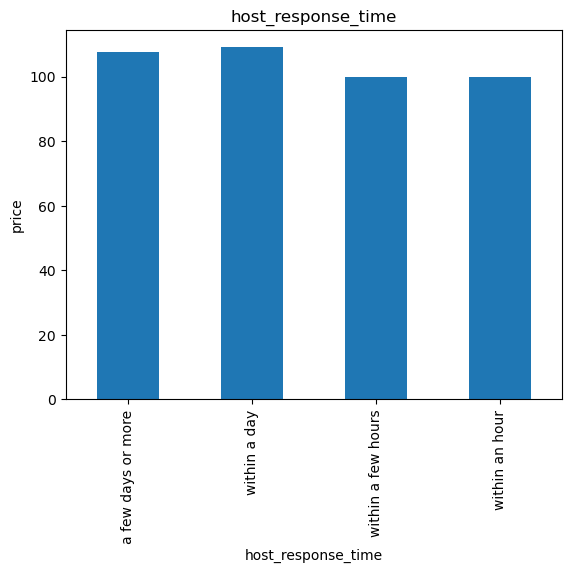

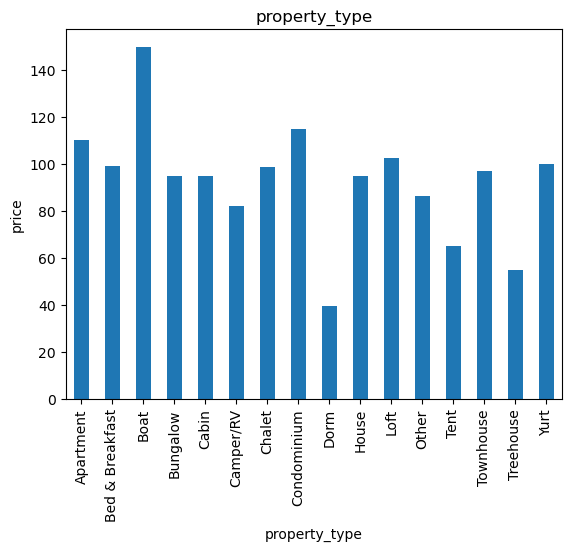

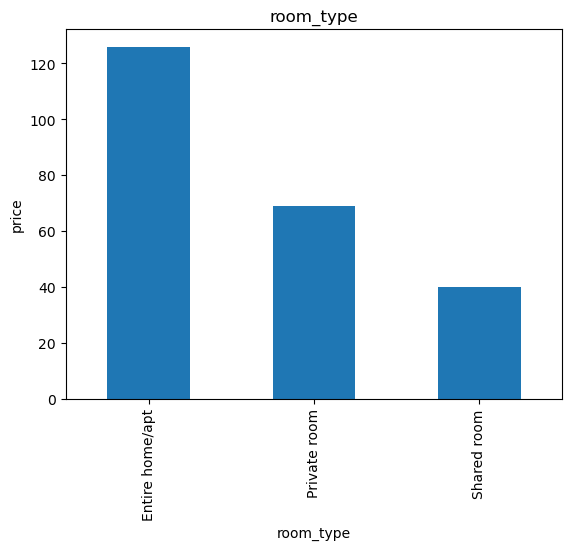

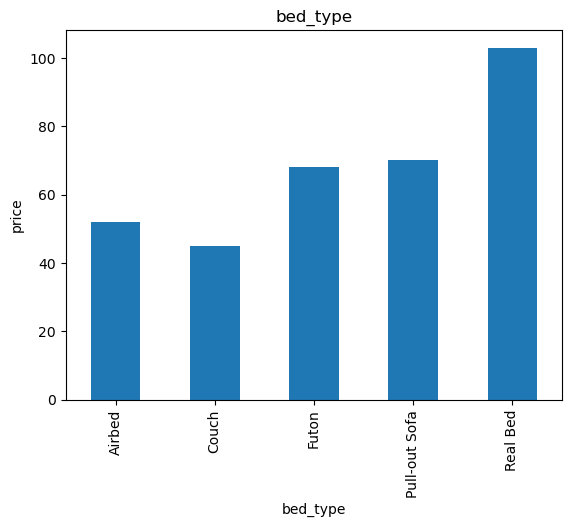

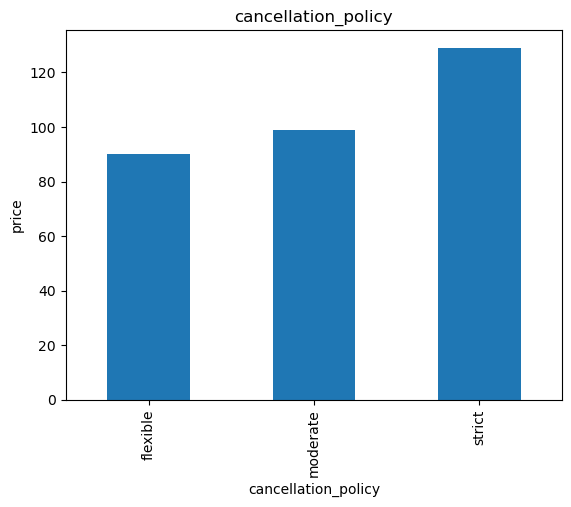

In [45]:
for feature in obj:
    new_airb.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [46]:
host_names=new_airb['host_name'].value_counts().index
host_names
host_value=new_airb['host_name'].value_counts().values

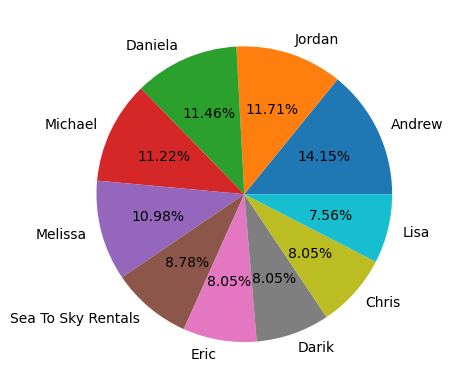

In [47]:
plt.pie(host_value[:10],labels=host_names[:10],autopct='%1.2f%%')
plt.show()

In [48]:
host_name_with_price =new_airb.groupby(['host_name','price']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['count'],ascending=False).head(20)
host_name_with_price.set_index('host_name')

,price,count
host_name,,
Andrew,40,16
Eric,69,12
Daniela,139,9
Daniela,183,6
David,99,5
Joe,350,5
Autumn,119,5
Michael,29,5
Emma,99,5


In [49]:
host_name_price=host_name_with_price.set_index('host_name')

<Axes: xlabel='price', ylabel='host_name'>

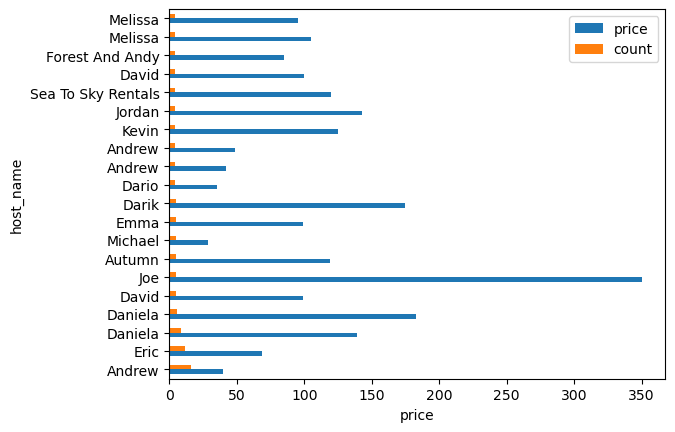

In [50]:
host_name_price.plot(kind='barh',ylabel='host_name',xlabel='price')

<Axes: >

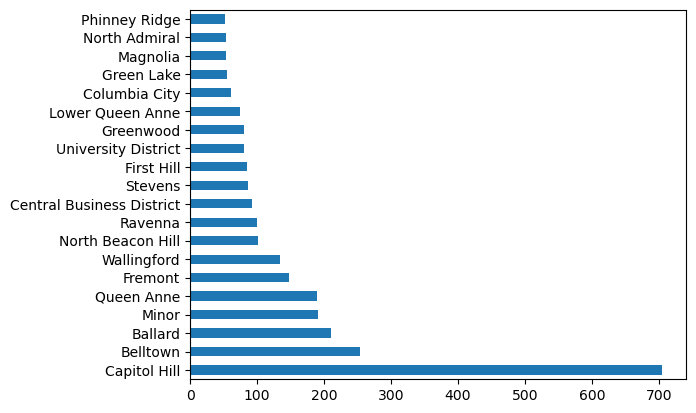

In [51]:
most_neigh = new_airb['neighbourhood'].value_counts()
most_neigh[:20].plot(kind='barh')

In [52]:
most_neigh_with_price =new_airb.groupby(['host_neighbourhood','price']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['price'],ascending=False).head(20)
most_neigh_with_price.set_index('host_neighbourhood')

,price,count
host_neighbourhood,,
Ravenna,1000,1
Belltown,999,1
Queen Anne,975,1
Magnolia,950,1
Belltown,899,1
Westlake,775,1
Montlake,750,1
Portage Bay,750,1
Queen Anne,749,1


<Axes: xlabel='price', ylabel='host_name'>

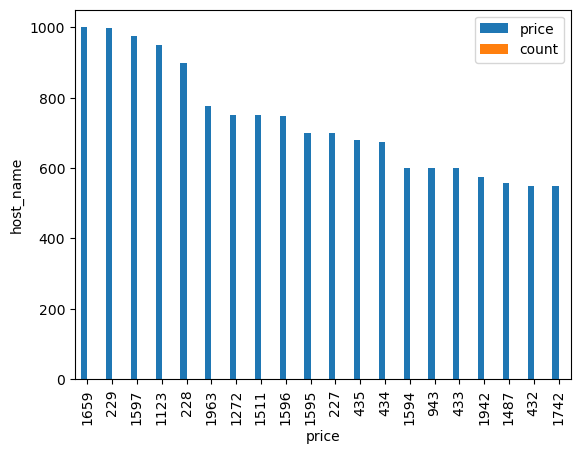

In [53]:
most_neigh_with_price.plot(kind='bar',ylabel='host_name',xlabel='price')

<Axes: xlabel='neighbourhood'>

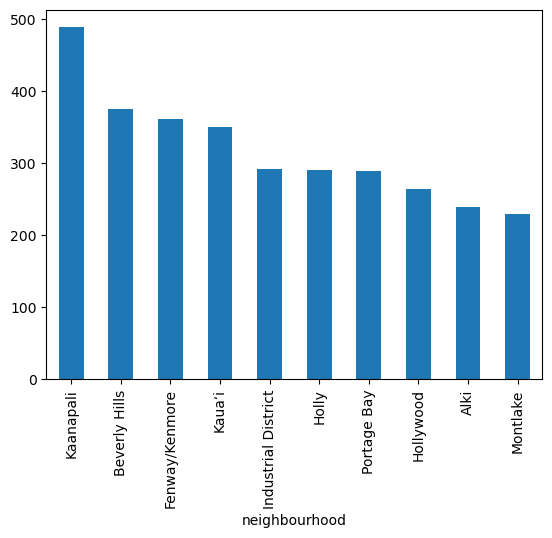

In [54]:
d = new_airb.groupby('neighbourhood')['price'].quantile(0.75).sort_values(ascending=False).head(10)
d.plot(kind='bar')

In [55]:
coord_list =[(lat,lon) for lat,lon in zip(new_airb['latitude'],new_airb['longitude'])]


In [56]:
m = folium.Map(location=(47.63628904,-122.3710252),title ="matter",zoom_start=10)
plugins.HeatMap(coord_list).add_to(m)
m
